# 0) 필요한 모듈 설치

In [ ]:
! pip3 install --upgrade pandas

# 1) 필요한 모듈 import

In [111]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
from matplotlib import font_manager, rc
import os

pd.set_option('mode.chained_assignment', None) # Warning 방지용

# 2) 데이터 load

In [113]:
# 공공 보건 의료 기관 현황 데이터 로드

data = pd.read_csv('공공보건의료기관현황.csv', index_col=0, encoding='CP949', engine='python')
data.head() #작업내용 확인용 출력

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [115]:
# 행정구열별 인구수 데이터 로드

population = pd.read_csv('행정구역_시군구_별__성별_인구수_2.csv', encoding='CP949', engine='python' )
population.head()    #작업 확인용 출력

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,"51,847,509","25,862,863","25,984,646"
1,서울특별시,소계,"9,733,509","4,745,088","4,988,421"
2,서울특별시,종로구,"151,215","73,688","77,527"
3,서울특별시,중구,"126,201","61,946","64,255"
4,서울특별시,용산구,"229,385","110,701","118,684"


In [198]:
# 현재 행정구역으로 업데이트(2024.09.24 기준)
# 세종특별자치시 에는 '군구'없이 '행정동'만 가지고 있습니다.
# '강원도'의 정식 명칭은 '강원특별자치도'입니다.
# '전라북도'의 정식 명칭은 '전북특별자치도'입니다.

# 행정구역 딕셔너리
Korea_district = {
    '서울특별시': ['종로구', '중구', '용산구', '성동구', '광진구', 
                  '동대문구', '중랑구', '성북구', '강북구', '도봉구', 
                  '노원구', '은평구', '서대문구', '마포구', '양천구', 
                  '강서구', '구로구', '금천구', '영등포구', '동작구', 
                  '관악구', '서초구', '강남구', '송파구', '강동구'],
    
    '부산광역시': ['중구', '서구', '동구', '영도구', '부산진구', 
                  '동래구', '남구', '북구', '해운대구', '사하구', 
                  '금정구', '강서구', '연제구', '수영구', '사상구', '기장군'],

    '대구광역시': ['중구', '동구', '서구', '남구', '북구', '수성구', '달서구', '달성군', '군위군'],

    '인천광역시': ['중구', '동구', '미추홀구', '연수구', '남동구', 
                  '부평구', '계양구', '서구', '강화군', '옹진군'],
    
    '광주광역시': ['동구', '서구', '남구', '북구', '광산구'],

    '대전광역시': ['동구', '중구', '서구', '유성구', '대덕구'],

    '울산광역시': ['중구', '남구', '동구', '북구', '울주군'],

    '세종특별자치시': ['세종시'],

    '경기도': ['수원시', '용인시', '고양시', '화성시', '성남시', 
              '부천시', '남양주시', '안산시', '평택시', '안양시', 
              '시흥시', '파주시', '김포시', '의정부시', '광주시',
              '하남시', '광명시', '군포시', '양주시', '오산시',
              '이천시', '안성시', '구리시', '의왕시', '포천시',
              '양평군', '여주시', '동두천시', '과천시',  '가평군', 
              '연천군'],

    '강원도': ['춘천시', '원주시', '강릉시', '동해시', '태백시', 
              '속초시', '삼척시', '홍천군', '횡성군', '영월군', 
              '평창군', '정선군', '철원군', '화천군', '양구군', 
              '인제군', '고성군', '양양군'],

    '충청북도': ['청주시', '충주시', '제천시', '보은군', '옥천군', 
               '영동군', '증평군', '진천군', '괴산군', '음성군', 
               '단양군'],

    '충청남도': ['천안시', '공주시', '보령시', '아산시', '서산시', 
               '논산시', '계룡시', '당진시', '금산군', '부여군', 
               '서천군', '청양군', '홍성군', '예산군', '태안군'],

    '전라북도': ['전주시', '군산시', '익산시', '정읍시', '남원시', 
               '김제시', '완주군', '진안군', '무주군', '장수군', 
               '임실군', '순창군', '고창군', '부안군'],

    '전라남도': ['목포시', '여수시', '순천시', '나주시', '광양시', 
               '담양군', '곡성군', '구례군', '고흥군', '보성군', 
               '화순군', '장흥군', '강진군', '해남군', '영암군', 
               '무안군', '함평군', '영광군', '장성군', '완도군', 
               '진도군', '신안군'],

    '경상북도': ['포항시', '경주시', '김천시', '안동시', '구미시', 
               '영주시', '영천시', '상주시', '문경시', '경산시', 
               '의성군', '청송군', '영양군', '영덕군', '청도군', 
               '고령군', '성주군', '칠곡군', '예천군', '봉화군', 
               '울진군', '울릉군'],

    '경상남도': ['창원시', '진주시', '통영시', '사천시', '김해시', 
               '밀양시', '거제시', '양산시', '의령군', '함안군', 
               '창녕군', '고성군', '남해군', '하동군', '산청군', 
               '함양군', '거창군', '합천군'],

    '제주특별자치도': ['제주시', '서귀포시']
}

# 3) 데이터 준비

In [318]:
## 주소에서 시도, 군구 정보 분리

addr = pd.DataFrame(data['주소'].apply(lambda v: v.split()[:2]).tolist(),
                    columns=('시도', '군구'))

addr.head()  #작업내용 확인용 출력

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


tolist()의 역할
- tolist()는 Pandas Series나 DataFrame을 Python의 기본 리스트(list)로 변환하는 역할
- tolist()를 사용하는 이유는 각 값이 리스트로 반환되도록 해서 DataFrame의 각 행(row)에 적절히 들어가도록 보장하는 것입니다.

- 차이점 시각화:
  
.tolist() 사용
시도	군구
서울	강남구
부산	해운대구

.tolist() 미사용 (원소가 리스트로 묶임)
시도	군구
[서울, 강남구]	NaN
[부산, 해운대구]	NaN

## 3-1) 의료기관 현황 데이터 처리

### 3-1-1) 이상치를 직접 찾기

In [12]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [14]:
addr[addr['시도'] == '창원시']

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [16]:
## 표준 행정구역 이름으로 수정 : 창원시-> 경상남도 창원시
addr.iloc[27] = ['경상남도', '창원시']
addr.iloc[31] = ['경상남도', '창원시']

In [18]:
addr.iloc[27]

시도    경상남도
군구     창원시
Name: 27, dtype: object

In [20]:
addr.iloc[31]

시도    경상남도
군구     창원시
Name: 31, dtype: object

In [22]:
addr[addr['시도'] == '경산시']

,시도,군구
47,경산시,경안로


In [24]:
addr.iloc[47] = ['경상북도', '경산시']

addr.iloc[47]

시도    경상북도
군구     경산시
Name: 47, dtype: object

In [26]:
addr[addr['시도'] == '천안시']

,시도,군구
209,천안시,동남구
210,천안시,동남구


In [28]:
## 표준 행정구역 이름으로 수정 : 천안시-> 충청남도 천안시
addr.iloc[209] = ['충청남도', '천안시']
addr.iloc[210] = ['충청남도', '천안시']

In [30]:
addr.iloc[209]

시도    충청남도
군구     천안시
Name: 209, dtype: object

In [32]:
addr.iloc[210]

시도    충청남도
군구     천안시
Name: 210, dtype: object

In [34]:
# 작업 결과 확인하기
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

In [36]:
## 표준 행정구역 이름으로 수정 :  경기 -> 경기도, 경남 -> 경상남도, ...
addr_aliases = {'경기':'경기도', '경남':'경상남도', '경북':'경상북도', 
                '충북':'충청북도', '서울시':'서울특별시', '부산특별시':'부산광역시', 
                '대전시':'대전광역시', '충남':'충청남도', 
                '전남':'전라남도', '전북':'전라북도'}

In [38]:
addr['시도']= addr['시도'].apply(lambda v: addr_aliases.get(v, v))

In [40]:
# 작업 결과 확인하기
addr['시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도', '대전광역시',
       '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시', '충청남도',
       '울산광역시'], dtype=object)

In [42]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

In [44]:
addr[addr['군구'] == '아란13길']

,시도,군구
75,제주특별자치도,아란13길


In [46]:
addr.iloc[75] = ['제주특별자치도', '제주시']

addr.iloc[75]

시도    제주특별자치도
군구        제주시
Name: 75, dtype: object

In [48]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '제주시', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군', '강동구',
       '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군', '양구군',
       '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구', '노원구',
       '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군', '연제구',
       '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구', '성동구',
       '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군', '진도군',
       '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시', '남원시',
       '군산시', '고창군', '진안군', '서귀포시', '천안시', '보령시', '서산시', '서천군', '홍성군',
     

### 3-1-2) 행정구역 딕셔너리를 이용하여 이상치 탐색

In [264]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [320]:
#korea_district의 key값으로 리스트를 만든다.
district_keys = list(Korea_district.keys())

# addr['시도'].unique()의 값을 sido에 대입한다.
# district_keys에 들어있지 않은 경우 sido 값을 not_matcing에 입력한다.
non_matching = [sido for sido in addr['시도'].unique() if sido not in district_keys]

print(non_matching)

['경기', '경남', '창원시', '경산시', '경북', '충북', '서울시', '부산특별시', '대전시', '충남', '전남', '전북', '천안시']


In [322]:
# 딕셔너리의 value와 key를 반대로 매핑
district_mapping = {value: key for key, values in Korea_district.items() for value in values}

# non_matching 값을 이용하여 '군구'와 '시도' 수정
for sido in non_matching:
    if sido in district_mapping:
        display(addr[addr['시도'] == sido])

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


,시도,군구
47,경산시,경안로


,시도,군구
209,천안시,동남구
210,천안시,동남구


In [324]:
# 딕셔너리의 value와 key를 반대로 매핑
district_mapping = {value: key for key, values in Korea_district.items() for value in values}

# non_matching 값을 이용하여 '군구'와 '시도' 수정
for sido in non_matching:
    if sido in district_mapping:
        key = district_mapping[sido]
        addr.loc[addr['시도'] == sido, '군구'] = sido  # '군구'를 value로 설정
        addr.loc[addr['시도'] == sido, '시도'] = key   # '시도'를 key로 설정

In [154]:
# # 창원시 : 경상남도 창원시
# # 경산시 : 경상북도 경산시
# # 천안시 : 충청남도 천안시

# addr.loc[addr['시도'] == '창원시', '군구'] = '창원시'
# addr.loc[addr['시도'] == '창원시', '시도'] = '경상남도'

# addr.loc[addr['시도'] == '경산시', '군구'] = '경산시'
# addr.loc[addr['시도'] == '경산시', '시도'] = '경상북도'

# addr.loc[addr['시도'] == '천안시', '군구'] = '천안시'
# addr.loc[addr['시도'] == '천안시', '시도'] = '충천남도'


In [326]:
display(addr.iloc[27], #창원시
addr.iloc[31], #창원시
addr.iloc[47], #경산시
addr.iloc[209], #천안시
addr.iloc[210] #천안시
)

시도    경상남도
군구     창원시
Name: 27, dtype: object

시도    경상남도
군구     창원시
Name: 31, dtype: object

시도    경상북도
군구     경산시
Name: 47, dtype: object

시도    충청남도
군구     천안시
Name: 209, dtype: object

시도    충청남도
군구     천안시
Name: 210, dtype: object

In [328]:
non_matching = [sido for sido in addr['시도'].unique() if sido not in district_keys]

print(non_matching)

['경기', '경남', '경북', '충북', '서울시', '부산특별시', '대전시', '충남', '전남', '전북']


In [330]:
## 표준 행정구역 이름으로 수정 :  경기 -> 경기도, 경남 -> 경상남도, ...
addr_aliases = {'경기':'경기도', '경남':'경상남도', '경북':'경상북도', 
                '충북':'충청북도', '서울시':'서울특별시', '부산특별시':'부산광역시', 
                '대전시':'대전광역시', '충남':'충청남도', 
                '전남':'전라남도', '전북':'전라북도'}

addr['시도']= addr['시도'].apply(lambda v: addr_aliases.get(v, v))

non_matching = [sido for sido in addr['시도'].unique() if sido not in district_keys]

print(non_matching)

[]


In [332]:
addr['시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도', '대전광역시',
       '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시', '충청남도',
       '울산광역시'], dtype=object)

In [334]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

In [336]:
# 딕셔너리의 value와 key를 반대로 매핑
district_mapping = {value: key for key, values in Korea_district.items() for value in values}

non_matching2 = [sido2 for sido2 in addr['군구'].unique() if sido2 not in district_mapping]

print(non_matching2)

['아란13길', '청원군', '동매로']


In [284]:
addr[addr['군구'] == '아란13길']

,시도,군구
75,제주특별자치도,아란13길


In [286]:
# 아란 13길은 제주특별자치도 제주시 아라1동(아라일동)
addr.loc[addr['군구'] == '아란13길', '군구'] = '제주시'
addr.iloc[75] #아란13길

시도    제주특별자치도
군구        제주시
Name: 75, dtype: object

In [288]:
addr[addr['군구'] == '청원군']

,시도,군구
110,충청북도,청원군


In [290]:
# 2014년 청원군과 청주시가 통합
addr.loc[addr['군구'] == '청원군', '군구'] = '청주시'
addr.iloc[110] #청원군

시도    충청북도
군구     청주시
Name: 110, dtype: object

In [292]:
addr[addr['군구'] == '동매로']

,시도,군구
155,부산광역시,동매로


In [294]:
#부산광역시 사하구 하단동 ~ 당리동
addr.loc[addr['군구'] == '동매로', '군구'] = '사하구'
addr.iloc[155] #동매로

시도    부산광역시
군구      사하구
Name: 155, dtype: object

### 3-1-3) 공통처리

In [296]:
addr['시도군구'] = addr.apply(lambda r: r['시도'] + ' ' + r['군구'], axis=1)

addr.head() #작업 확인용 출력

,시도,군구,시도군구
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시


In [298]:
addr['count'] = 0  # 의료기관수 합계를 저장할 컬럼 만들기

addr.head() #작업 확인용 출력

,시도,군구,시도군구,count
0,강원도,춘천시,강원도 춘천시,0
1,강원도,삼척시,강원도 삼척시,0
2,강원도,영월군,강원도 영월군,0
3,강원도,원주시,강원도 원주시,0
4,강원도,강릉시,강원도 강릉시,0


In [300]:
addr_group =pd.DataFrame(addr.groupby(['시도', '군구', '시도군구'], 
                                      as_index=False).count())

addr_group.head()  #작업 확인용 출력

,시도,군구,시도군구,count
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1


In [302]:
addr_group = addr_group.set_index("시도군구")

addr_group.head()   #작업 확인용 출력

,시도,군구,count
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1


## 3-2) 행정구역 인구 데이터 처리

In [304]:
population = population.rename(columns = {'행정구역(시군구)별(1)': '시도','행정구역(시군구)별(2)': '군구'}) #컬럼이름 변경

population.head()  #작업 확인용 출력

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,"51,847,509","25,862,863","25,984,646"
1,서울특별시,소계,"9,733,509","4,745,088","4,988,421"
2,서울특별시,종로구,"151,215","73,688","77,527"
3,서울특별시,중구,"126,201","61,946","64,255"
4,서울특별시,용산구,"229,385","110,701","118,684"


In [306]:
# '군구' 컬럼에서 공백 제거하기
for element in range(0,len(population)):
      population['군구'][element] = population['군구'][element].strip()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13148\3696827445.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  population['군구'][element] = population['군구'][element].strip()


In [308]:
# '시도'와 '군구'를 연결하여 '시도군구' 컬럼 추가
population['시도군구']= population.apply(lambda r: r['시도'] + ' ' + r['군구'], axis=1)

population.head()  #작업 확인용 출력

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
0,전국,소계,"51,847,509","25,862,863","25,984,646",전국 소계
1,서울특별시,소계,"9,733,509","4,745,088","4,988,421",서울특별시 소계
2,서울특별시,종로구,"151,215","73,688","77,527",서울특별시 종로구
3,서울특별시,중구,"126,201","61,946","64,255",서울특별시 중구
4,서울특별시,용산구,"229,385","110,701","118,684",서울특별시 용산구


In [310]:
population = population[population.군구 != '소계']

population.head()  #작업 확인용 출력

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
2,서울특별시,종로구,"151,215","73,688","77,527",서울특별시 종로구
3,서울특별시,중구,"126,201","61,946","64,255",서울특별시 중구
4,서울특별시,용산구,"229,385","110,701","118,684",서울특별시 용산구
5,서울특별시,성동구,"300,410","147,020","153,390",서울특별시 성동구
6,서울특별시,광진구,"351,263","170,164","181,099",서울특별시 광진구


In [312]:
population = population.set_index("시도군구")

population.head()  #작업 확인용 출력

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,"151,215","73,688","77,527"
서울특별시 중구,서울특별시,중구,"126,201","61,946","64,255"
서울특별시 용산구,서울특별시,용산구,"229,385","110,701","118,684"
서울특별시 성동구,서울특별시,성동구,"300,410","147,020","153,390"
서울특별시 광진구,서울특별시,광진구,"351,263","170,164","181,099"


In [314]:
addr_population_merge = pd.merge(addr_group, population,  how='inner',  
                                 left_index=True, right_index=True)

addr_population_merge.head()   #작업 확인용 출력

,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,"213,328","105,775","107,553"
강원도 동해시,강원도,동해시,1,강원도,동해시,"90,417","45,782","44,635"
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,"66,806","33,811","32,995"
강원도 속초시,강원도,속초시,1,강원도,속초시,"81,840","40,470","41,370"
강원도 양구군,강원도,양구군,1,강원도,양구군,"22,526","11,937","10,589"


In [73]:
local_MC_Population = addr_population_merge[['시도_x', '군구_x',  
                                             'count', '총인구수 (명)']]

local_MC_Population.head()   #작업 확인용 출력  

,시도_x,군구_x,count,총인구수 (명)
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,"213,328"
강원도 동해시,강원도,동해시,1,"90,417"
강원도 삼척시,강원도,삼척시,1,"66,806"
강원도 속초시,강원도,속초시,1,"81,840"
강원도 양구군,강원도,양구군,1,"22,526"


In [75]:
 #컬럼이름 변경
local_MC_Population = local_MC_Population.rename(columns = {'시도_x': '시도',
                                                            '군구_x': '군구',
                                                            '총인구수 (명)': '인구수' })

local_MC_Population.head()  #작업 확인용 출력

,시도,군구,count,인구수
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,"213,328"
강원도 동해시,강원도,동해시,1,"90,417"
강원도 삼척시,강원도,삼척시,1,"66,806"
강원도 속초시,강원도,속초시,1,"81,840"
강원도 양구군,강원도,양구군,1,"22,526"


In [77]:
local_MC_Population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 강원도 강릉시 to 충청북도 충주시
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      138 non-null    object
 1   군구      138 non-null    object
 2   count   138 non-null    int64 
 3   인구수     138 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.4+ KB


In [79]:
local_MC_Population['인구수'] = local_MC_Population['인구수'].str.replace(',', '')
local_MC_Population['인구수'] = local_MC_Population['인구수'].astype('int64')

In [81]:
MC_count = local_MC_Population['count']
local_MC_Population['MC_ratio'] = MC_count.div(local_MC_Population['인구수'], axis=0)*100000

local_MC_Population.head()   #작업 확인용 출력

,시도,군구,count,인구수,MC_ratio
시도군구,,,,,
강원도 강릉시,강원도,강릉시,4,213328,1.875047
강원도 동해시,강원도,동해시,1,90417,1.105987
강원도 삼척시,강원도,삼척시,1,66806,1.496872
강원도 속초시,강원도,속초시,1,81840,1.221896
강원도 양구군,강원도,양구군,1,22526,4.439315


# 4) 시각화하기

## 4-1) 막대 그래프

In [86]:
style.use('ggplot')

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

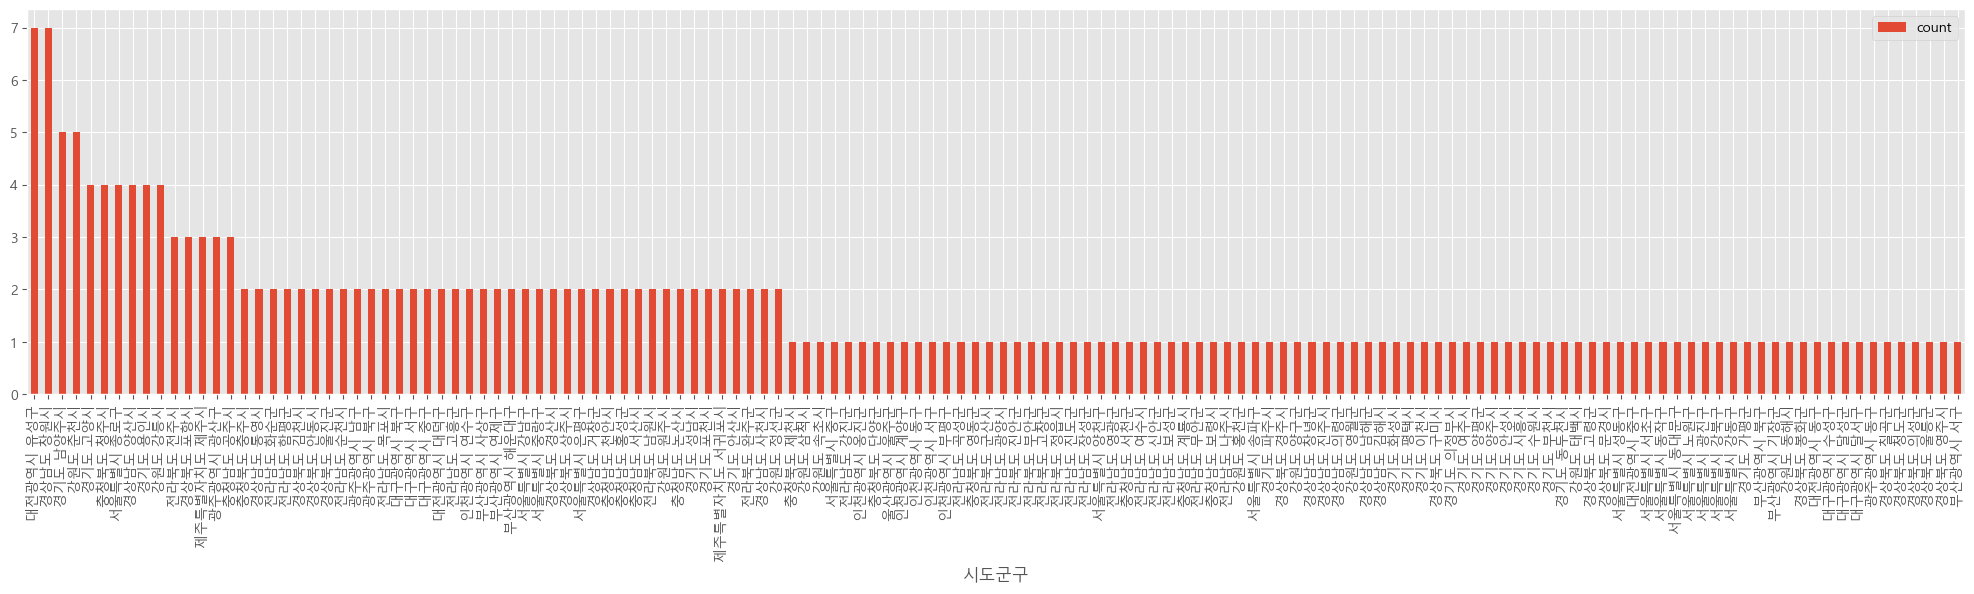

In [88]:
MC_ratio = local_MC_Population[['count']]
MC_ratio = MC_ratio.sort_values('count', ascending = False)
plt.rcParams["figure.figsize"] = (25,5)
MC_ratio.plot(kind='bar', rot=90)
plt.show()

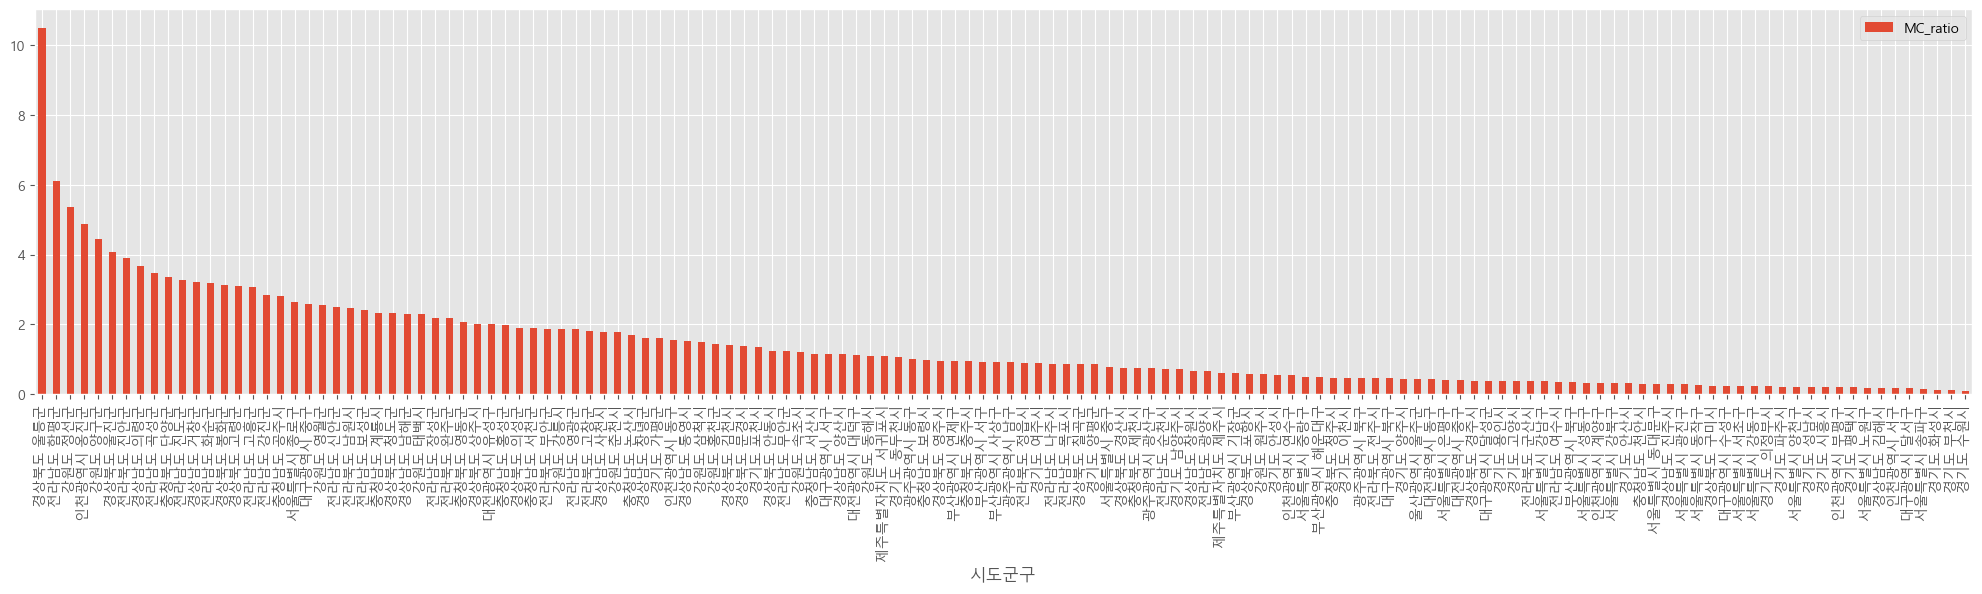

In [90]:
MC_ratio = local_MC_Population[['MC_ratio']]
MC_ratio = MC_ratio.sort_values('MC_ratio', ascending = False)
plt.rcParams["figure.figsize"] = (25,5)
MC_ratio.plot(kind='bar', rot=90)
plt.show()

## 4-2) 블록맵 시각화

In [93]:
path = os.getcwd()

In [95]:
data_draw_korea = pd.read_csv(path+'/data_draw_korea.csv', index_col=0, encoding='UTF-8', engine='python')

data_draw_korea.head()   #작업 확인용 출력

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [97]:
data_draw_korea['시도군구']= data_draw_korea.apply(lambda r: r['광역시도'] + ' ' + r['행정구역'], axis=1)

data_draw_korea.head()  #작업 확인용 출력

,인구수,shortName,x,y,면적,광역시도,행정구역,시도군구
0,202520,강릉,11,4,1040.07,강원도,강릉시,강원도 강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군,강원도 고성군
2,86747,동해,11,5,180.01,강원도,동해시,강원도 동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시,강원도 삼척시
4,76733,속초,9,1,105.25,강원도,속초시,강원도 속초시


In [99]:
data_draw_korea = data_draw_korea.set_index("시도군구")

data_draw_korea.head()  #작업 확인용 출력

,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시


In [101]:
data_draw_korea_MC_Population_all = pd.merge(data_draw_korea,local_MC_Population,  how='outer',  left_index=True, right_index=True)

data_draw_korea_MC_Population_all.head()

,인구수_x,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,인구수_y,MC_ratio
시도군구,,,,,,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시,강원도,강릉시,4.0,213328.0,1.875047
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군,NaN,NaN,NaN,NaN,NaN
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시,강원도,동해시,1.0,90417.0,1.105987
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시,강원도,삼척시,1.0,66806.0,1.496872
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시,강원도,속초시,1.0,81840.0,1.221896


In [103]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

In [105]:
def draw_blockMap(blockedMap, targetData, title, color ):
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.title(title)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
    
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
            dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
            if len(row['행정구역']) <= 2:
                dispname += row['행정구역'][-1]
        else:
            dispname = row['행정구역'][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
    
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)
    plt.axis('off')
    
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    
    plt.savefig( 'blockMap_' + targetData + '.png')
                      
    
    plt.show()      

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13148\3224784780.py:47: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(shrink=.1, aspect=10)


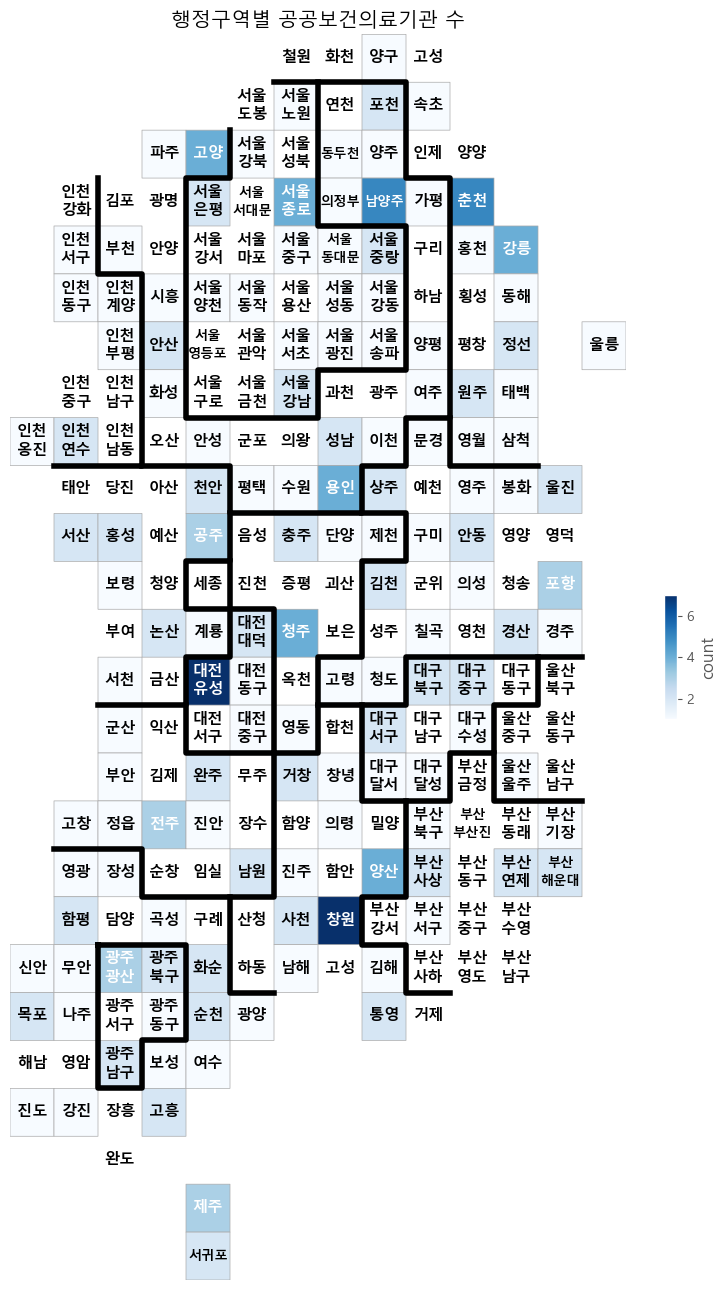

In [107]:
draw_blockMap(data_draw_korea_MC_Population_all, 'count', '행정구역별 공공보건의료기관 수', 'Blues')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13148\3224784780.py:47: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(shrink=.1, aspect=10)


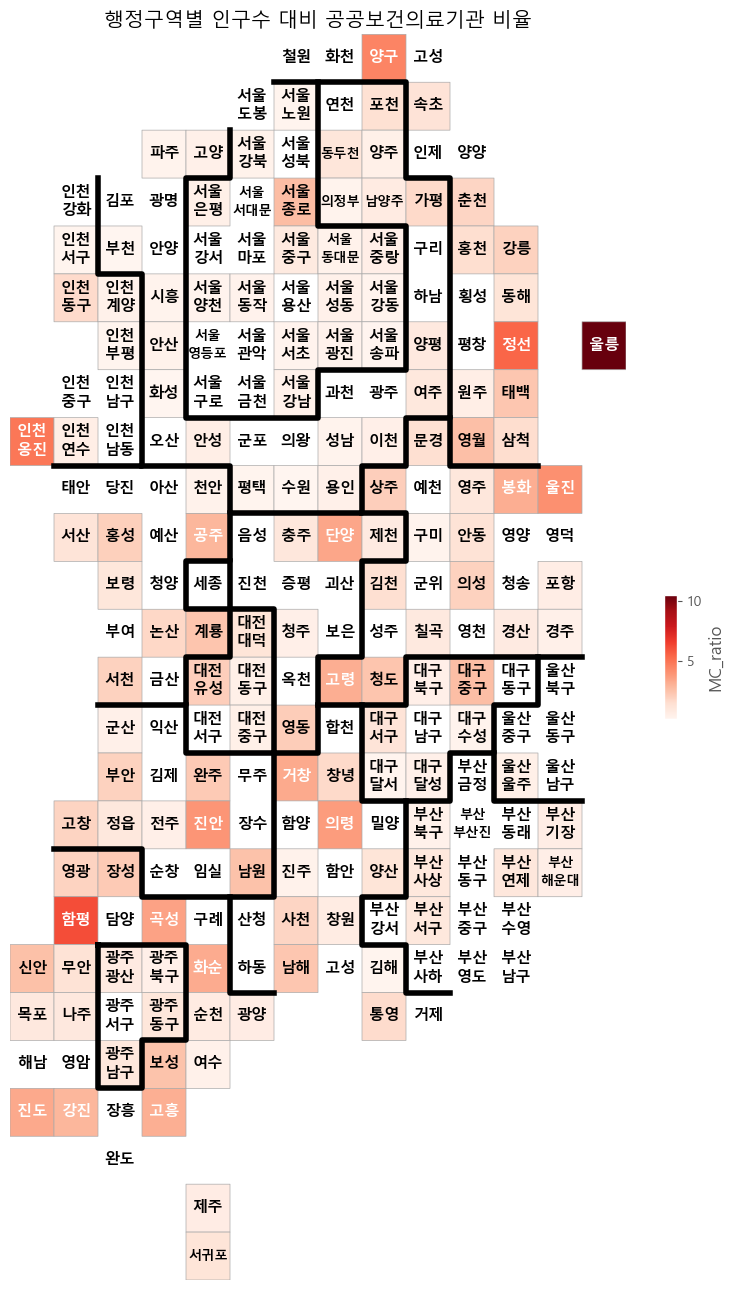

In [109]:
draw_blockMap(data_draw_korea_MC_Population_all, 'MC_ratio', '행정구역별 인구수 대비 공공보건의료기관 비율', 'Reds' )

In [338]:
! pip install geopy

   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   ------------ -------------------------- 41.0/125.4 kB 653.6 kB/s eta 0:00:01
   ---------------------------------- --- 112.6/125.4 kB 930.9 kB/s eta 0:00:01
   ---------------------------------------- 125.4/125.4 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00


In [340]:
from geopy.geocoders import Nominatim
import time

# 주소 리스트
addresses = [
    ['서울시', '강남구', '학동로', '211'],
    ['서울시', '강남구', '광평로', '280', '수서동'],
    ['서울시', '강남구', '논현로', '566', '강남차병원'],
    ['서울시', '서초구', '강남대로', '369']
]

# Nominatim 객체 생성
geolocator = Nominatim(user_agent="my_geocoder_app")

# 좌표를 저장할 리스트
coordinates = []

# 주소를 좌표로 변환
for addr in addresses:
    address_string = ' '.join(addr)
    location = geolocator.geocode(address_string)
    if location:
        coordinates.append((location.latitude, location.longitude))
    else:
        coordinates.append((None, None))  # 좌표를 찾을 수 없는 경우
    time.sleep(1)  # 요청 간 대기 시간

# 결과 출력
for addr, coord in zip(addresses, coordinates):
    print(f"주소: {' '.join(addr)} -> 좌표: {coord}")

주소: 서울시 강남구 학동로 211 -> 좌표: (37.5210828, 127.060056)
주소: 서울시 강남구 광평로 280 수서동 -> 좌표: (37.4873268, 127.1002501)
주소: 서울시 강남구 논현로 566 강남차병원 -> 좌표: (37.5067013, 127.03478848206151)
주소: 서울시 서초구 강남대로 369 -> 좌표: (37.4947105, 127.0286733)
